# doc.c.mesh.gdf - Mesh Data to (Geo)DataFrames

The `doc.c.mesh.gdf` object provides access to the mesh data (nodes and elements) as GeoDataframes. 

The `doc.c.mesh.df` object provides access to the mesh data (nodes and elements) as standard Dataframes (without geometric data). 

DataFrames are objects to store tabulated data, similar to a Spreadsheet. They can be processed by the python package *pandas*, which provide a rich set of powerful tools for further data processing. DataFrames can often be used as direct input for other packages like numpy and matplotlib. For further information, see [pandas.pydata.org](https://pandas.pydata.org).

GeoDataFrames are objects similar to shapefiles. They can be processed using GeoPANDAS, a Python library with usefull features for 2D Geometry operations including export to shp-files and basic GIS operations. See the project website [geopandas.org](https://www.geopandas.org) for further information.

**Note:** If no georeference is required, consider working with standard DataFrames instead of GeoDataFrame to avoid poor performance. GeoDataFrames may suffer from poor performance especially for large models. The respective functionality is provided by the `doc.c.mesh.df` module, which provides the same method with identical syntax.

*contact: [Alex Renz](https://github.com/red5alex), are@dhigroup.com* 

In [1]:
import sys
sys.path.append("C:/Program Files/DHI/2019/FEFLOW 7.2/python")
import ifm_contrib as ifm 
ifm.forceLicense("Viewer")
doc = ifm.loadDocument("./../../unittests/models/example_2D.dac")

The `doc.c.mesh.gdf` object provides functions to obtain the model elements as a GeoDataframe (2D and 3D Layered only).

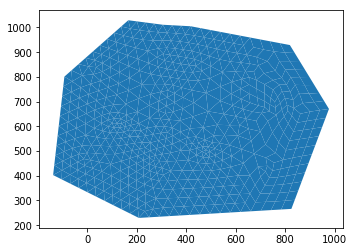

In [2]:
%matplotlib inline
doc.c.mesh.gdf.elements().plot()

It is possible to add model parameters to the GeoDataFrame by specifying a dictionary `{ <column_name>: <Paramater id>}`. The `Parameter id` is best taken from `ifm.Enum` (constants starting with `P_`).  

element_shape  ELEMENT  LAYER  \
ELEMENT                                                                      
0        POLYGON ((-134.115113451162 442.5190616583842,...        0      1   
1        POLYGON ((-138.6770926846236 402.6777763528196...        1      1   
2        POLYGON ((-102.736080976536 422.4841839709929,...        2      1   
3        POLYGON ((-104.0060505103155 385.3422552656655...        3      1   
4        POLYGON ((-129.5531342177004 482.3603469639488...        4      1   

         TOP_ELEMENT        AREA  Transmissivity  
ELEMENT                                           
0                  0  670.789841             1.0  
1                  1  654.882480             1.0  
2                  2  611.430186             1.0  
3                  3  621.170244             1.0  
4                  4  651.018324             1.0

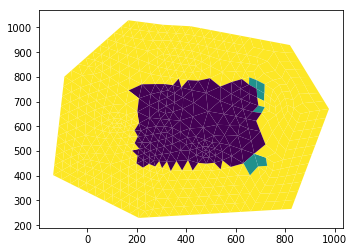

In [3]:
from ifm import Enum

# get dataframe including Transmissivity
gdf = doc.c.mesh.gdf.elements({"Transmissivity" : Enum.P_TRANS})
gdf.plot("Transmissivity", label="Transmissivity")
gdf.head()

in combination with the `doc.c.sel` object, we can easily locate the elements belonging to a specified item selection.

In [4]:
# see which selections are available
# note: returns selections of all types if no type is specified 
doc.c.sel.getSelectionNames()

['west', 'east', 'abstraction_rate', 'upper_half', 'conversiontest_el']

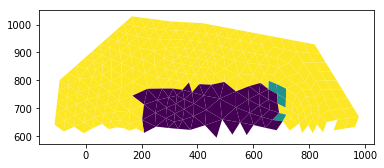

In [5]:
# plot the transmissivity only for the elemental selection 'upper_half'
gdf.iloc[doc.c.sel.list('upper_half')].plot("Transmissivity")